In [ ]:
Задание 1
Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы:

Как критики относятся к спортивным играм?
Критикам нравятся больше игры на PC или на PS4?
Критикам больше нравятся стрелялки или стратегии?
Для каждого вопроса:

сформулируйте нулевую и альтернативную гипотезы;
выберите пороговый уровень статистической значимости;
опишите полученные результаты статистического теста.

In [ ]:
import pandas as pd

In [ ]:
df_games = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')
df_games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#нас интересуют жанр, платформа и критики
crit_opinions = df_games[['Platform', 'Genre', 'Critic_Score']]
crit_opinions

,Platform,Genre,Critic_Score
0,Wii,Sports,76.0
1,NES,Platform,NaN
2,Wii,Racing,82.0
3,Wii,Sports,80.0
4,GB,Role-Playing,NaN
...,...,...,...
16714,PS3,Action,NaN
16715,X360,Sports,NaN
16716,PSV,Adventure,NaN
16717,GBA,Platform,NaN


In [ ]:
crit_opinions['Critic_Score'] = crit_opinions['Critic_Score'].fillna(crit_opinions['Critic_Score'].mean()) #избавимся от пустых значений

<ipython-input-4-3e421aa10c76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crit_opinions['Critic_Score'] = crit_opinions['Critic_Score'].fillna(crit_opinions['Critic_Score'].mean()) #избавимся от пустых значений


In [ ]:
crit_opinions

,Platform,Genre,Critic_Score
0,Wii,Sports,76.000000
1,NES,Platform,68.967679
2,Wii,Racing,82.000000
3,Wii,Sports,80.000000
4,GB,Role-Playing,68.967679
...,...,...,...
16714,PS3,Action,68.967679
16715,X360,Sports,68.967679
16716,PSV,Adventure,68.967679
16717,GBA,Platform,68.967679


In [ ]:
#узнаем как критики относятся к спортивным играм. гипотеза: нейтрально, т.е. средняя оценка для спортивных игр не отличается от средней
#через статистический тест будем определять

crit_all = crit_opinions['Critic_Score']
crit_op_sports = crit_opinions[crit_opinions.Genre == 'Sports']
crit_sports = crit_op_sports['Critic_Score']

In [ ]:
type(crit_all)

pandas.core.series.Series

In [ ]:
import numpy as np
crit_all_array = crit_all.to_numpy() #превратим в массив array
crit_all_array

array([76.        , 68.96767851, 82.        , ..., 68.96767851,
       68.96767851, 68.96767851])

In [ ]:
crit_sports_array = crit_sports.to_numpy() 
crit_sports_array

array([76.        , 80.        , 80.        , ..., 68.96767851,
       68.96767851, 68.96767851])

In [ ]:
import scipy.stats as st #проверяем, есть ли статистически значимая разница оценок

stat, p = st.ttest_ind(crit_sports_array, crit_all_array, equal_var=False)
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, средняя оценка для спортивных игр, вероятно, не отличается от средней для всех игр")
else:
    print("Отклоняем нулевую гипотезу, средняя оценка для спортивных игр, вероятно, отличается от средней для всех игр")

Статистика = 6.942, p = 0.000
Отклоняем нулевую гипотезу, средняя оценка для спортивных игр, вероятно, отличается от средней для всех игр


In [ ]:
#теперь узнаем, как критики относятя к играм на PC и на PS4
crit_opinions

,Platform,Genre,Critic_Score
0,Wii,Sports,76.000000
1,NES,Platform,68.967679
2,Wii,Racing,82.000000
3,Wii,Sports,80.000000
4,GB,Role-Playing,68.967679
...,...,...,...
16714,PS3,Action,68.967679
16715,X360,Sports,68.967679
16716,PSV,Adventure,68.967679
16717,GBA,Platform,68.967679


In [ ]:
crit_op_pc = crit_opinions[crit_opinions.Platform == 'PC']
#crit_op_pc
crit_pc_array = crit_op_pc['Critic_Score'].to_numpy() 
crit_pc_array

array([86.        , 93.        , 88.        , 68.96767851, 93.        ,
       68.96767851, 96.        , 91.        , 94.        , 79.        ,
       68.96767851, 75.        , 70.        , 82.        , 85.        ,
       68.96767851, 68.96767851, 89.        , 83.        , 68.96767851,
       68.96767851, 96.        , 90.        , 68.96767851, 74.        ,
       68.96767851, 90.        , 68.96767851, 68.96767851, 68.96767851,
       68.96767851, 80.        , 82.        , 85.        , 78.        ,
       74.        , 90.        , 79.        , 86.        , 81.        ,
       94.        , 68.96767851, 88.        , 74.        , 68.96767851,
       84.        , 83.        , 64.        , 81.        , 68.96767851,
       91.        , 84.        , 76.        , 85.        , 68.96767851,
       74.        , 68.96767851, 96.        , 84.        , 84.        ,
       83.        , 86.        , 92.        , 86.        , 90.        ,
       68.96767851, 87.        , 86.        , 68.96767851, 91.  

In [ ]:
crit_op_ps4 = crit_opinions[crit_opinions.Platform == 'PS4']
#crit_op_ps4
crit_ps4_array = crit_op_ps4['Critic_Score'].to_numpy() 
crit_ps4_array

array([68.96767851, 97.        , 82.        , 68.96767851, 83.        ,
       85.        , 87.        , 82.        , 76.        , 93.        ,
       68.96767851, 86.        , 77.        , 68.96767851, 88.        ,
       80.        , 85.        , 92.        , 70.        , 87.        ,
       87.        , 78.        , 80.        , 85.        , 93.        ,
       76.        , 83.        , 87.        , 84.        , 83.        ,
       80.        , 83.        , 73.        , 92.        , 83.        ,
       68.96767851, 76.        , 73.        , 81.        , 90.        ,
       73.        , 74.        , 71.        , 89.        , 80.        ,
       86.        , 79.        , 88.        , 73.        , 68.96767851,
       68.        , 75.        , 82.        , 68.96767851, 63.        ,
       54.        , 61.        , 71.        , 79.        , 89.        ,
       83.        , 79.        , 68.96767851, 68.96767851, 85.        ,
       68.96767851, 68.96767851, 75.        , 73.        , 68.96

In [ ]:
import scipy.stats as st

stat, p = st.ttest_ind(crit_ps4_array, crit_pc_array, equal_var=False)
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, средняя оценка для игр PS4, вероятно, не отличается от средней для игр PC")
else:
    print("Отклоняем нулевую гипотезу, средняя оценка для игр PS4, вероятно, отличается от средней для игр PC")

Статистика = -5.154, p = 0.000
Отклоняем нулевую гипотезу, средняя оценка для игр PS4, вероятно, отличается от средней для игр PC


In [ ]:
#также проанализируем отношение критиков к таким играм, как стрелялки или стратегии
crit_opinions

,Platform,Genre,Critic_Score
0,Wii,Sports,76.000000
1,NES,Platform,68.967679
2,Wii,Racing,82.000000
3,Wii,Sports,80.000000
4,GB,Role-Playing,68.967679
...,...,...,...
16714,PS3,Action,68.967679
16715,X360,Sports,68.967679
16716,PSV,Adventure,68.967679
16717,GBA,Platform,68.967679


In [ ]:
crit_op_shoot = crit_opinions[crit_opinions.Genre == 'Shooter']
crit_shoot = crit_op_shoot['Critic_Score']
crit_shoot_array = crit_shoot.to_numpy() 
crit_shoot_array

array([68.96767851, 88.        , 68.96767851, ..., 68.96767851,
       61.        , 68.96767851])

In [ ]:
crit_op_strat = crit_opinions[crit_opinions.Genre == 'Strategy']
crit_strat = crit_op_strat['Critic_Score']
crit_strat_array = crit_strat.to_numpy() 
crit_strat_array

array([68.96767851, 68.96767851, 93.        , 68.96767851, 68.96767851,
       68.96767851, 68.96767851, 82.        , 68.96767851, 68.96767851,
       68.96767851, 68.96767851, 90.        , 86.        , 89.        ,
       68.96767851, 68.96767851, 88.        , 59.        , 83.        ,
       68.96767851, 68.96767851, 65.        , 74.        , 90.        ,
       84.        , 87.        , 81.        , 68.96767851, 90.        ,
       68.96767851, 44.        , 88.        , 75.        , 77.        ,
       85.        , 68.96767851, 68.96767851, 84.        , 68.96767851,
       68.96767851, 69.        , 68.96767851, 85.        , 70.        ,
       84.        , 68.96767851, 76.        , 89.        , 68.96767851,
       68.96767851, 92.        , 68.96767851, 69.        , 81.        ,
       76.        , 89.        , 68.96767851, 68.96767851, 68.96767851,
       90.        , 68.96767851, 68.96767851, 68.96767851, 86.        ,
       68.96767851, 68.96767851, 90.        , 68.96767851, 68.96

In [ ]:
stat, p = st.ttest_ind(crit_shoot_array, crit_strat_array, equal_var=False)
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, средняя оценка для стрелялок, вероятно, не отличается от средней для стратегий")
else:
    print("Отклоняем нулевую гипотезу, средняя оценка для стрелялок, вероятно, отличается от средней для стратегий")

Статистика = -1.124, p = 0.261
Не отклоняем нулевую гипотезу, средняя оценка для стрелялок, вероятно, не отличается от средней для стратегий


In [ ]:
Задание 2
Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений 
(используемые данные здесь) по признаку спама. Для этого:

Привидите весь текст к нижнему регистру;
Удалите мусорные символы;
Удалите стоп-слова;
Привидите все слова к нормальной форме;
Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
Можете поэкспериментировать с параметрами TfidfVectorizer;
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;
7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;
8) Опишите результаты при помощи confusion_matrix;
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные 
неправильно (с указанием фактического и предсказанного).

In [ ]:
# импорт библиотек
import glob
import pandas as pd

In [ ]:
words = pd.read_html('https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv')

print(words)

[      Unnamed: 0 Category                                            Message
0            NaN      ham  Go until jurong point, crazy.. Available only ...
1            NaN      ham                      Ok lar... Joking wif u oni...
2            NaN     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3            NaN      ham  U dun say so early hor... U c already then say...
4            NaN      ham  Nah I don't think he goes to usf, he lives aro...
...          ...      ...                                                ...
5567         NaN     spam  This is the 2nd time we have tried 2 contact u...
5568         NaN      ham               Will ü b going to esplanade fr home?
5569         NaN      ham  Pity, * was in mood for that. So...any other s...
5570         NaN      ham  The guy did some bitching but I acted like i'd...
5571         NaN      ham                         Rofl. Its true to its name

[5572 rows x 3 columns]]


In [ ]:
type(words) #это список 

list

In [ ]:
df_words = words[0] #теперь это датафрейм
df_words

,Unnamed: 0,Category,Message
0,NaN,ham,"Go until jurong point, crazy.. Available only ..."
1,NaN,ham,Ok lar... Joking wif u oni...
2,NaN,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,NaN,ham,U dun say so early hor... U c already then say...
4,NaN,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5567,NaN,spam,This is the 2nd time we have tried 2 contact u...
5568,NaN,ham,Will ü b going to esplanade fr home?
5569,NaN,ham,"Pity, * was in mood for that. So...any other s..."
5570,NaN,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#приведем все фразы к нижнему регистру
df_words['Message_change'] = df_words.Message.str.lower()
df_words

,Unnamed: 0,Category,Message,Message_change
0,NaN,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,NaN,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,NaN,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,NaN,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,NaN,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."
...,...,...,...,...
5567,NaN,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5568,NaN,ham,Will ü b going to esplanade fr home?,will ü b going to esplanade fr home?
5569,NaN,ham,"Pity, * was in mood for that. So...any other s...","pity, * was in mood for that. so...any other s..."
5570,NaN,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...


In [ ]:
#уберем все служебные символы

df_words['Message_change'] = df_words['Message_change'].replace(to_replace ='[\W_]+', value = ' ', regex = True)
df_words

,Unnamed: 0,Category,Message,Message_change
0,NaN,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,NaN,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,NaN,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,NaN,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,NaN,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...
...,...,...,...,...
5567,NaN,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5568,NaN,ham,Will ü b going to esplanade fr home?,will ü b going to esplanade fr home
5569,NaN,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that so any other suggest...
5570,NaN,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i d...


In [ ]:
#теперь нужно убрать все стоп-слова. для этого сначала разделим фразы на отдельные слова
def divis(phr):
  return phr.split()

df_words['Message_change'] = df_words['Message_change'].apply(divis)

In [ ]:
df_words.head(11)

,Unnamed: 0,Category,Message,Message_change
0,NaN,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o..."
1,NaN,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,NaN,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,NaN,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t..."
4,NaN,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, don, t, think, he, goes, to, usf, he,..."
5,NaN,spam,FreeMsg Hey there darling it's been 3 week's n...,"[freemsg, hey, there, darling, it, s, been, 3,..."
6,NaN,ham,Even my brother is not like to speak with me. ...,"[even, my, brother, is, not, like, to, speak, ..."
7,NaN,ham,As per your request 'Melle Melle (Oru Minnamin...,"[as, per, your, request, melle, melle, oru, mi..."
8,NaN,spam,WINNER!! As a valued network customer you have...,"[winner, as, a, valued, network, customer, you..."
9,NaN,spam,Had your mobile 11 months or more? U R entitle...,"[had, your, mobile, 11, months, or, more, u, r..."


In [ ]:
len(df_words['Message_change'].iloc[10])

24

In [ ]:
#и удалим стоп-слова
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))

def remov(phr):
  new_phr = []
  for word in phr:
    if word not in stopwords_set:
      new_phr.append(word)
  return new_phr

df_words['Message_change'] = df_words['Message_change'].apply(remov)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_words.head(20)

,Unnamed: 0,Category,Message,Message_change
0,NaN,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,NaN,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,NaN,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,NaN,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,NaN,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]"
5,NaN,spam,FreeMsg Hey there darling it's been 3 week's n...,"[freemsg, hey, darling, 3, week, word, back, l..."
6,NaN,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aids..."
7,NaN,ham,As per your request 'Melle Melle (Oru Minnamin...,"[per, request, melle, melle, oru, minnaminungi..."
8,NaN,spam,WINNER!! As a valued network customer you have...,"[winner, valued, network, customer, selected, ..."
9,NaN,spam,Had your mobile 11 months or more? U R entitle...,"[mobile, 11, months, u, r, entitled, update, l..."


In [ ]:
len(df_words['Message_change'].iloc[10]) #длина отдельной фразы действительно сократилась

12

In [ ]:
#приведем все слова к нормальной форме (лемматизация)
from nltk.stem import WordNetLemmatizer #ипмортируем нужный функционал
nltk.download('omw-1.4')
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

def lemm(phr):
  for word in phr:
    wordnet_lemmatizer.lemmatize(word)
  return phr

df_words['Message_change'] = df_words['Message_change'].apply(lemm)


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df_words

,Unnamed: 0,Category,Message,Message_change
0,NaN,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,NaN,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,NaN,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,NaN,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,NaN,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]"
...,...,...,...,...
5567,NaN,spam,This is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,NaN,ham,Will ü b going to esplanade fr home?,"[ü, b, going, esplanade, fr, home]"
5569,NaN,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, suggestions]"
5570,NaN,ham,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, interested, buyin..."


In [ ]:
df_words['Message_change'].iloc[10]

['gonna',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'cried',
 'enough',
 'today']

In [ ]:
#теперь создадим столбик датафрейма, в котором будут фразы склеенные, чтобы мы смогли их преобразовать в вектора

def joi(phr):
  return ' '.join(phr)

df_words['Message_jo'] = df_words['Message_change'].apply(joi)

In [ ]:
df_words

,Unnamed: 0,Category,Message,Message_change,Message_jo
0,NaN,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,NaN,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,NaN,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
3,NaN,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,NaN,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]",nah think goes usf lives around though
...,...,...,...,...,...
5567,NaN,spam,This is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, 750, poun...",2nd time tried 2 contact u u 750 pound prize 2...
5568,NaN,ham,Will ü b going to esplanade fr home?,"[ü, b, going, esplanade, fr, home]",ü b going esplanade fr home
5569,NaN,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, suggestions]",pity mood suggestions
5570,NaN,ham,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, interested, buyin...",guy bitching acted like interested buying some...


In [ ]:
#преобразуем все сообщения в вектора TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_words.Message_jo)
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix #получаем матрицу

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = df_words['Category'] #определим x и y для модели
X = tfidf_matrix

In [ ]:
import numpy as np

X.shape

(5572, 8571)

In [ ]:
y.shape

(5572,)

In [ ]:
# разделяем данные на тренировочные и тестовые
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#построим модель логистической регрессии, оценим ее точность на тестовых данных
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

logisticRegr.predict(X_test)

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
predictions = logisticRegr.predict(X_test)

In [ ]:
score = logisticRegr.score(X_test, y_test) #узнаем точность модели
print(score)

0.9562096195262024


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
#опишем результаты при помощи confusion_matrix

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1206    1]
 [  60  126]]


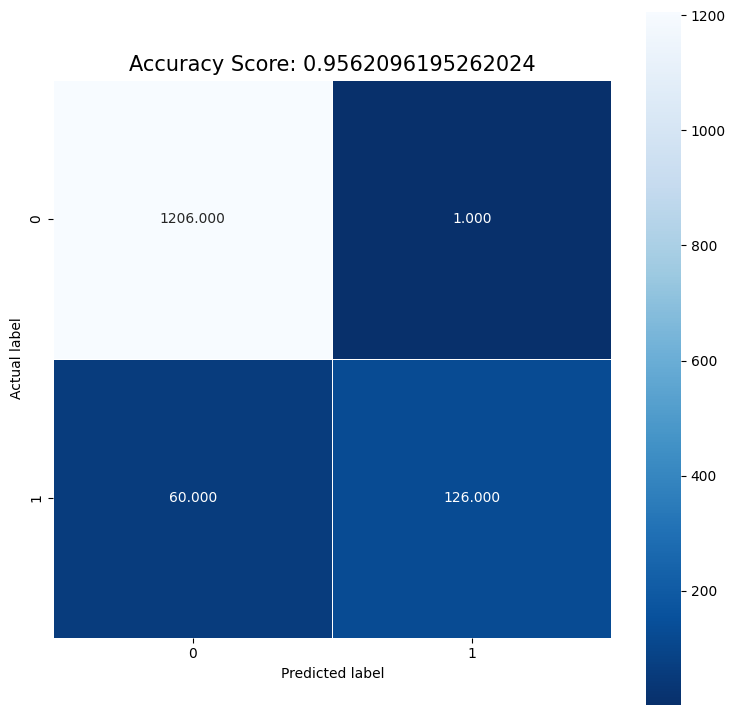

In [ ]:
#для наглядности визуализируем полученную матрицу

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
'''теперь создадим датафрейм в который поместим все неверные прогнозы модели'''
y_test

3245    ham
944     ham
1044    ham
2484    ham
812     ham
       ... 
668     ham
218     ham
5536    ham
1657    ham
3875    ham
Name: Category, Length: 1393, dtype: object

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
X_test

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
3245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
res = pd.DataFrame(data={'fact': y_test, 'pred': predictions}) #создаем датафрейм с реальными и спрогнозированными данными

res.index = X_test.index #выставляем индекс X_test
res = res[res.fact != res.pred] #отбираем только ошибки модели
res.join(df_words[['Message']]) #добавляем столбец с сообщениями

,fact,pred,Message
2952,ham,spam,Hey now am free you can call me.
881,spam,ham,Reminder: You have not downloaded the content ...
1961,spam,ham,Guess what! Somebody you know secretly fancies...
3864,spam,ham,Oh my god! I've found your number again! I'm s...
2575,spam,ham,Your next amazing xxx PICSFREE1 video will be ...
...,...,...,...
1507,spam,ham,Thanks for the Vote. Now sing along with the s...
68,spam,ham,"Did you hear about the new ""Divorce Barbie""? I..."
5377,spam,ham,The current leading bid is 151. To pause this ...
3132,spam,ham,LookAtMe!: Thanks for your purchase of a video...
